In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 1️⃣ Cargar el dataset
# Asegúrate de subir 'dataset_picor.csv' antes de ejecutar esto

df = pd.read_csv('dataset_picor.csv')

# 2️⃣ Exploración básica del dataset
print("\n📌 Información del dataset:")
df.info()



📌 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   patient_id  9000 non-null   int64
 1   day         9000 non-null   int64
 2   q1          9000 non-null   int64
 3   q2          9000 non-null   int64
 4   q3          9000 non-null   int64
 5   q4          9000 non-null   int64
 6   q5          9000 non-null   int64
 7   q6          9000 non-null   int64
 8   w1          9000 non-null   int64
 9   w2          9000 non-null   int64
 10  w3          9000 non-null   int64
 11  w4          9000 non-null   int64
 12  w5          9000 non-null   int64
 13  w6          9000 non-null   int64
 14  w7          9000 non-null   int64
 15  w8          9000 non-null   int64
dtypes: int64(16)
memory usage: 1.1 MB



📊 Estadísticas descriptivas:
        patient_id          day           q1           q2           q3  \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000   
mean     50.500000    45.500000     4.782111     4.391444     2.318556   
std      28.867674    25.980602     2.907083     4.186665     1.775977   
min       1.000000     1.000000     0.000000     0.000000     0.000000   
25%      25.750000    23.000000     2.000000     2.000000     1.000000   
50%      50.500000    45.500000     5.000000     3.000000     2.000000   
75%      75.250000    68.000000     7.000000     5.000000     4.000000   
max     100.000000    90.000000    10.000000    16.000000     5.000000   

                q4           q5           q6           w1           w2  \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000   
mean      2.318778     2.317556     1.390000    60.251889    36.957444   
std       1.777438     1.765457     1.462237    52.820484    13.255374   
min    

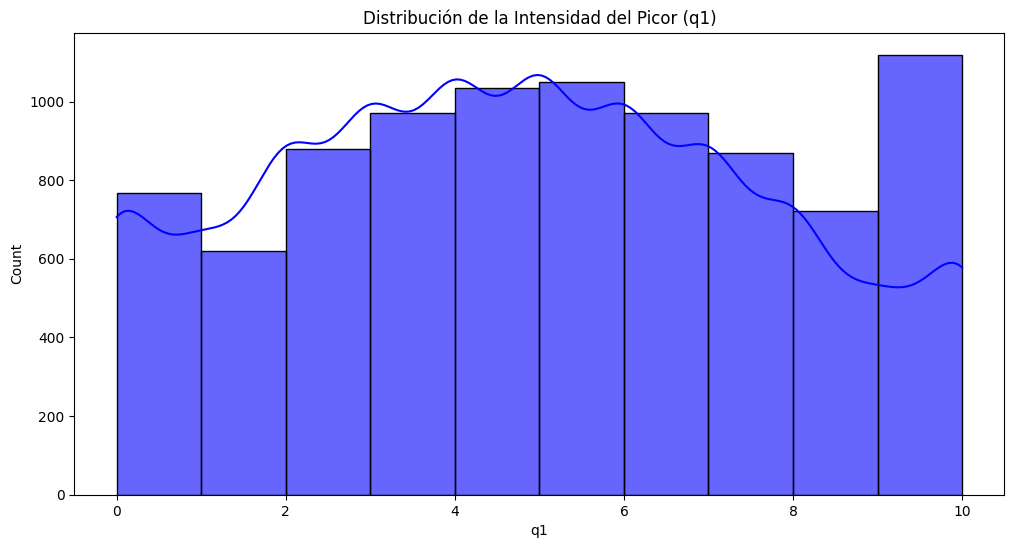

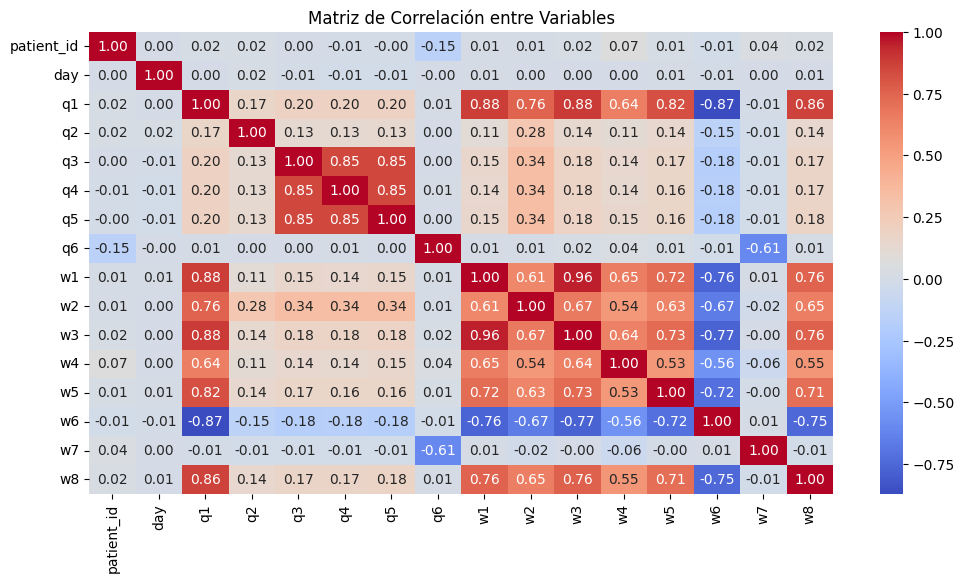

In [3]:
print("\n📊 Estadísticas descriptivas:")
print(df.describe())

# 3️⃣ Visualización de la distribución de variables importantes
plt.figure(figsize=(12, 6))
sns.histplot(df['q1'], bins=10, kde=True, color='blue', alpha=0.6)
plt.title("Distribución de la Intensidad del Picor (q1)")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación entre Variables")
plt.show()




In [4]:
 #4️⃣ Preprocesamiento: Normalización de datos
features = ['q1', 'q2', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])



In [5]:
# 5️⃣ Aplicación de Modelos de Clustering
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

df['Cluster_KMeans'] = kmeans_labels

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)
df['Cluster_DBSCAN'] = dbscan_labels

# Clustering Jerárquico
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(df_scaled)
df['Cluster_Hierarchical'] = hierarchical_labels


In [6]:


# 6️⃣ Evaluación de Modelos
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
silhouette_dbscan = silhouette_score(df_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
silhouette_hierarchical = silhouette_score(df_scaled, hierarchical_labels)

dbi_kmeans = davies_bouldin_score(df_scaled, kmeans_labels)
dbi_dbscan = davies_bouldin_score(df_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
dbi_hierarchical = davies_bouldin_score(df_scaled, hierarchical_labels)

print(f"\n📊 Evaluación de Clustering:")
print(f"- K-Means: Silhouette = {silhouette_kmeans:.3f}, DBI = {dbi_kmeans:.3f}")
print(f"- DBSCAN: Silhouette = {silhouette_dbscan:.3f}, DBI = {dbi_dbscan:.3f}")
print(f"- Jerárquico: Silhouette = {silhouette_hierarchical:.3f}, DBI = {dbi_hierarchical:.3f}")




📊 Evaluación de Clustering:
- K-Means: Silhouette = 0.287, DBI = 1.107
- DBSCAN: Silhouette = 0.195, DBI = 1.365
- Jerárquico: Silhouette = 0.274, DBI = 1.096


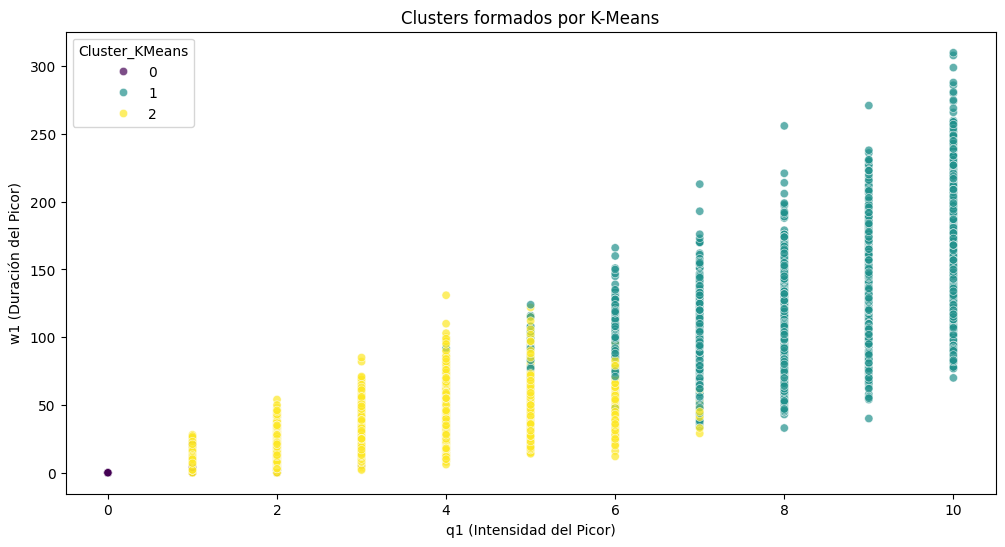

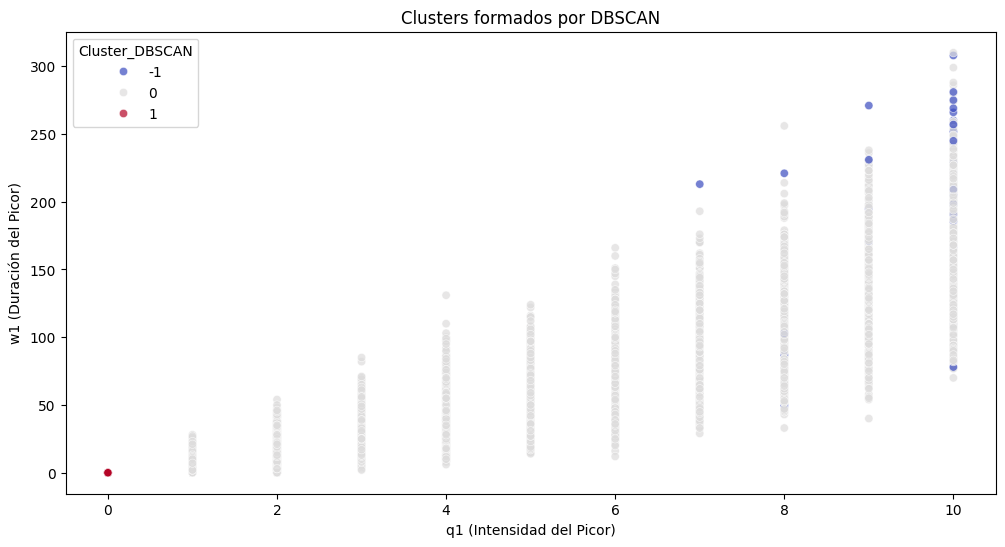

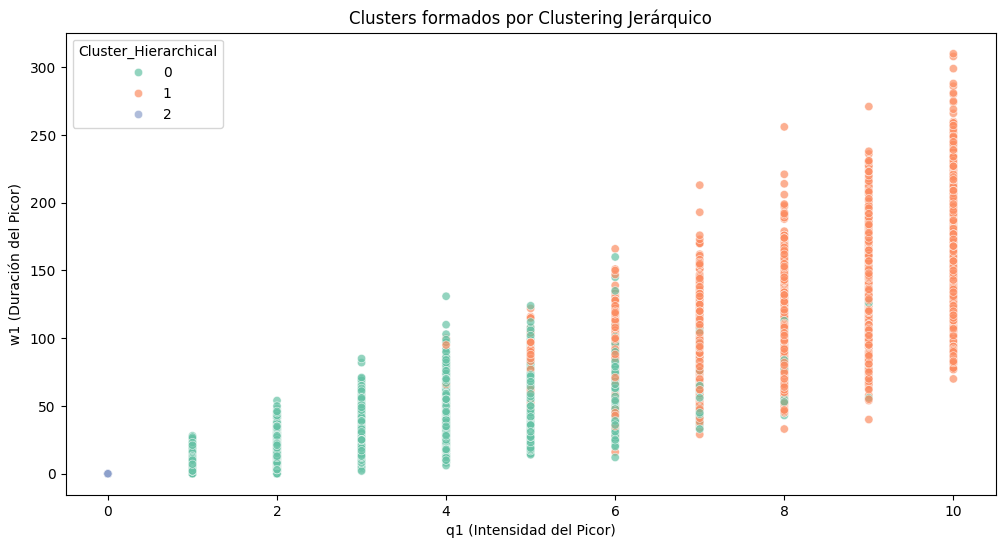


✅ Análisis finalizado. Revisa las gráficas y métricas para interpretar los resultados.


In [7]:
# 7️⃣ Visualización de los clusters obtenidos
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['q1'], y=df['w1'], hue=df['Cluster_KMeans'], palette='viridis', alpha=0.7)
plt.title("Clusters formados por K-Means")
plt.xlabel("q1 (Intensidad del Picor)")
plt.ylabel("w1 (Duración del Picor)")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['q1'], y=df['w1'], hue=df['Cluster_DBSCAN'], palette='coolwarm', alpha=0.7)
plt.title("Clusters formados por DBSCAN")
plt.xlabel("q1 (Intensidad del Picor)")
plt.ylabel("w1 (Duración del Picor)")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['q1'], y=df['w1'], hue=df['Cluster_Hierarchical'], palette='Set2', alpha=0.7)
plt.title("Clusters formados por Clustering Jerárquico")
plt.xlabel("q1 (Intensidad del Picor)")
plt.ylabel("w1 (Duración del Picor)")
plt.show()

print("\n✅ Análisis finalizado. Revisa las gráficas y métricas para interpretar los resultados.")